## [Problem 1] Classifying fully connected layers

In [3]:
from pickletools import optimize
from re import A
from turtle import forward
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

In [6]:
class FC:
    """
    Number of nodes Full connection layer from n_nodes1 to n_nodes2
    Parameters
    ----------
    n_nodes1 : int
      Number of nodes in the previous layer
    n_nodes2 : int
      Number of nodes in the next layer
    initializer : Instance of initialization method
    optimizer : Instance of optimization method
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer, activation):
        self.optimizer = optimizer
        self.initializer = initializer
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.activation = activation
        # Initialization
        # Initialize self.W and self.B using the #initialr method

        self.W = self.initializer.W(self.n_nodes1, self.n_nodes2)
        self.B = self.initializer.B(self.n_nodes2)

    def forward(self, X):
        """
        forward propagation

        Parameters
        ----------
        X : ndarray, shape (batch_size, n_nodes1)
            input
        Returns
        ----------
        A : のndarray, shape (batch_size, n_nodes2)
            output
        """
        self.X = X
        self.A = np.dot(self.X, self.W) + self.B
        A = self.activation.forward(self.A)
        return A
    def backward(self, dA):
        """
        backward propagation
        Parameters
        ----------
        dA : ndarray, shape (batch_size, n_nodes2)
            Gradient descent from behind
        Returns
        ----------
        dZ : ndarray, shape (batch_size, n_nodes1)
            Gradient descent forward
        """
        dA = self.activation.backward(dA)
        self.dB = np.mean(dA, axis = 0)
        self.dW = np.dot(self.X.T, dA)/len(self.X)
        dZ = np.dot(dA, self.W.T)

        self = self.optimizer.update(self)
        return dZ

## [Problem 2] Classifying the initialization method

In [7]:
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        W : ndarray shape with (n_nodes1, n_nodes2)
          weights of hidden layer
        """
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W

    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        B : ndarray shape with (n_nodes2, 1)
          bias of hidden layer
        """
        B = np.zeros(n_nodes2)
        return B

## [Problem 3] Classifying optimization methods

In [8]:
class SGD:
    """
    Stochastic gradient descent
    Parameters
    ----------
    lr : learning rate
    """
    def __init__(self, lr):
        self.lr = lr

    def update(self, layer):
        """
        Update weights and biases for a layer
        Parameters
        ----------
        layer : Instance of the layer before update
        """

        layer.W -= self.lr*layer.dW
        layer.B -= self.lr*layer.dB

        return layer

## [Problem 4] Classifying activation functions

In [9]:
class softmax():
  """
  Activation function - softmax
  """
  def __init__(self):
      pass

  def forward(self, A):
    temp = np.exp(A - np.max(A))/np.sum(np.exp(A-np.max(A)), axis = 1, keepdims= True)
    return temp

  def backward(self, dZ):
    return dZ

## [Problem 5] ReLU class creation

In [10]:
class ReLU():
  """
  Activation function - relu
  """
  def __init__(self):
      pass

  def forward(self, A):
    self.A = A
    temp = np.maximum(self.A, 0)
    return temp

  def backward(self, dZ):
    ret = np.where(self.A>0, dZ, 0)
    return ret

In [11]:
class tanh():
  """
  Activation function - tangent
  """
  def __init__(self):
      pass

  def forward(self, A):
    self.A = A
    self.Z = np.tanh(self.A)

    return self.Z

  def backward(self, dZ):
    ret = dZ * (1-self.Z**2)
    return ret

## [Problem 6] Initial value of weight

In [12]:
class XavierInitializer:
    """
    Xavier initialization
    """

    def __init__(self):
        pass

    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        W : ndarray shape with (n_nodes1, n_nodes2)
          weights of hidden layer
        """
        W = np.random.randn(n_nodes1, n_nodes2)/np.sqrt(n_nodes1)
        return W

    def B(self, n_nodes2):
        """
        bias initializer
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        B : ndarray shape with (n_nodes2, 1)
          bias of hidden layer
        """
        B = np.zeros(n_nodes2)
        return B

In [13]:
class HeInitializer:
    """
    He initialization
    """

    def __init__(self):
        pass

    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        W : ndarray shape with (n_nodes1, n_nodes2)
          weights of hidden layer
        """
        W = np.random.randn(n_nodes1, n_nodes2)/np.sqrt(2/n_nodes1)
        return W

    def B(self, n_nodes2):
        """
        bias initializer
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        B : ndarray shape with (n_nodes2, 1)
          bias of hidden layer
        """
        B = np.zeros(n_nodes2)
        return B

## [Problem 7] Optimization method

In [14]:
class Adagrad:
  """
  stochastic gradient descent method

  Parameters
  -----------
  lr : learning rate
  """
  def __init__(self, lr):
      self.lr = lr
      self.hW = 0
      self.hB = 0

  def update(self,layer):
    """
    Updating the weights and biases of a layer
    Parameters
    -----------
    layer : Instance of the layer before the update
    """
    self.hW += layer.dW * layer.dW
    self.hB = layer.dB * layer.dB

    layer.W -= self.lr * layer.dW/(np.sqrt(self.hW) + 1e-7)
    layer.B -=self.lr * layer.dB/(np.sqrt(self.hB) + 1e-7)

    return layer

In [15]:
class GetMiniBatch:
    """
    Iterator to get a mini-batch
    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
      training data
    y : ndarray, shape (n_samples, 1)
      Label of training data
    batch_size : int
      batch size
    seed : int
      NumPy random seed
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int64)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

## [Problem 8] Class completion

In [16]:
class ScratchDeepNeuralNetrowkClassifier():
    """
    A Simple three-layer neural network classifier

    Parameters
    ----------

    Attributes
    ----------
    """

    def __init__(self, n_epoch = 50, n_features = 784, n_nodes1 = 400, n_nodes2 = 200, n_output = 10,
                sigma = 0.01, n_batch = 20, learning_rate = 0.01, verbose = False):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.n_epoch = n_epoch
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.sigma = sigma
        self.n_batch = n_batch
        self.lr = learning_rate
        self.log_loss = np.zeros(self.n_epoch)

    def loss_function(self, y, yt):
        delta = 1e-7
        return -np.mean(yt*np.log(y + delta))

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Train a neural network classifier.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        y : ndarray, shape (n_samples, )
            Label of training data
        X_val : ndarray, shape (n_samples, n_features)
            Features of validation data
        y_val : ndarray, shape (n_samples, )
            Label of validation data
        """
        #self.log_loss = []
        # initialize weights
        optimizer1 = Adagrad(self.lr)
        optimizer2 = Adagrad(self.lr)
        optimizer3 = Adagrad(self.lr)

        initializer1 = XavierInitializer()
        initializer2 = HeInitializer()
        initializer3 = SimpleInitializer(self.sigma)

        # the loss function for each epoch


        self.FC1 = FC(self.n_features, self.n_nodes1, initializer1, optimizer1,tanh())
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, initializer2, optimizer2,tanh())
        self.FC3 = FC(self.n_nodes2, self.n_output, initializer3, optimizer3,softmax())

        for epoch in range(self.n_epoch):
            get_mini_batch = GetMiniBatch(X, y , batch_size = self.n_batch)
            self.loss = 0

            for mini_X_train , mini_y_train in get_mini_batch:
                #forward propagation
                #1st layer
                self.z1 = self.FC1.forward(mini_X_train)
                #2nd layer
                self.z2 = self.FC2.forward(self.z1)
                #3rd layer
                self.z3 = self.FC3.forward(self.z2)

                # back propagation
                #3rd layer
                self.dA3 = (self.z3 - mini_y_train)/self.n_batch
                #2nd layer
                self.dz2 = self.FC3.backward(self.dA3)
                #1st layer
                self.dz1 = self.FC2.backward(self.dz2)
                self.dz0 = self.FC1.backward(self.dz1)

                #backpropagation
                self.loss += self.loss_function(self.z3, mini_y_train)

            # record loss function for each epoch
            self.log_loss[epoch] = self.loss/len(get_mini_batch)

            if self.verbose:
                print('epoch:{} loss:{}'.format(epoch, self.loss/self.n_batch))

    def predict(self, X):
        """
        Estimate using a neural network classifier.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            training sample

        Returns
        -------
        pred:    ndarray, shape (n_samples, 1)
            predicted result
        """

        pred_z1 = self.FC1.forward(X)
        pred_z2 = self.FC2.forward(pred_z1)
        pred = np.argmax(self.FC3.forward(pred_z2), axis=1)
        return pred

## [Problem 9] Learning and estimation

X_train data shape:  (60000, 28, 28)
X_test data shape:  (10000, 28, 28)
X_train flatten data shape:  (60000, 784)
X_test flatten data shape:  (10000, 784)
X_train max value: 1.0
X_train min value: 0.0
Train dataset: (48000, 784)
Validation dataset: (12000, 784)
epoch:0 loss:6.417844792216172
epoch:1 loss:3.9262688601669304
epoch:2 loss:3.502578878668546
epoch:3 loss:3.2528825682628786
epoch:4 loss:3.0533322246805144
epoch:5 loss:2.944515913847214
epoch:6 loss:2.8510921685121495
epoch:7 loss:2.8008108418470767
epoch:8 loss:2.6638813836475554
epoch:9 loss:2.602938584116295
epoch:10 loss:2.5734411792487286
epoch:11 loss:2.557115655872357
epoch:12 loss:2.485464817837012
epoch:13 loss:2.4342289323301225
epoch:14 loss:2.388674295692683
epoch:15 loss:2.276491639955922
epoch:16 loss:2.2798672371406097
epoch:17 loss:2.2287516721271583
epoch:18 loss:2.184397955940269
epoch:19 loss:2.2023002425881346
epoch:20 loss:2.199636162920864
epoch:21 loss:2.1998471878362946
epoch:22 loss:2.159133153283772

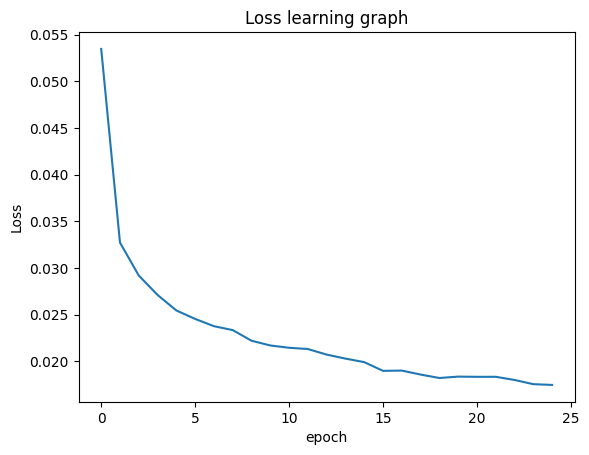

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train data shape: ", X_train.shape) # (60000, 28, 28)
print("X_test data shape: ", X_test.shape) # (10000, 28, 28)

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

print("X_train flatten data shape: ", X_train.shape) # (60000, 28, 28)
print("X_test flatten data shape: ", X_test.shape) # (10000, 28, 28)

# Preprocessing

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
X_train /= 255
X_test /= 255
print('X_train max value:', X_train.max()) # 1.0
print('X_train min value:', X_train.min()) # 0.0

# the correct label is an integer from 0 to 9, but it is converted to a one-hot representation

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
y_train_one_hot = enc.fit_transform(y_train.reshape(-1,1))
y_val_one_hot = enc.fit_transform(y_val.reshape(-1,1))
print("Train dataset:", X_train.shape) # (48000, 784)
print("Validation dataset:", X_val.shape) # (12000, 784)

clf = ScratchDeepNeuralNetrowkClassifier(n_epoch = 25, n_features = 784, n_nodes1 = 400, n_nodes2 = 200, n_output = 10,
                sigma = 0.01, n_batch = 20, learning_rate = 0.01, verbose = True)

clf.fit(X_train, y_train_one_hot)
pred = clf.predict(X_val)
print(pred)
acc = accuracy_score(y_val, pred)
print("Accuracy:", acc)

fig = plt.subplots()
plt.title("Loss learning graph")
plt.xlabel("epoch")
plt.ylabel('Loss')
plt.plot(clf.log_loss)
plt.show()